# Linear Regression and Confidence
### Why the spread of `X` matters!

In [2]:
##Get them stats in here: the essentials
import numpy as np 
import pandas as pd 
from scipy import stats
import statsmodels.api as sm
import matplotlib.pylab as plt 
%matplotlib inline

#A few niceties you're also welcome to use.
from statsmodels.stats.outliers_influence import summary_table
from patsy import dmatrices # for making design matrices out of categorical features #instead of sm.add_constant
import seaborn as sns #for pairsplots


C:\Users\zacha\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


From lecture, we have mentioned confidence intervals:

There are more types on confidence intervals we may care about!

- Last slide was how to perform inference on the parameters of the line $\beta$. We also might care about inference on values of Y !
    
- A confidence band is how sure we are about the mean of Y at specific values of X, or $E[Y|X]$.
    
- A prediction band is how we estimate the distribution of new Y observations at specific values of X. It's the same as the confidence band, but also includes our estimate for $\varepsilon$.

Let's look at how to generate all 3 of these, and also consider the errors from our usual estimators:

$$s.e.(\hat{\beta_0})= \sigma \sqrt{\frac{1}{n}+\frac{\bar{X}^2}{\left(\sum X_i-\bar{X} \right)^2}}; \qquad s.e.(\hat{\beta_1})= \sigma \sqrt{\frac{1}{\left(\sum X_i-\bar{X} \right)^2}}.$$

So that $$\sum_i (X_i-\bar{X})^2$$ in the denominator of our estimates is a little scary...

Let's look at a few simulated data sets to explore how our confidence in the slope changes as the locations of the observations move.

For each model, the *true* data is coming from a process where $y=x+\varepsilon$, and the errors are iid normals with variance of 1.


### Case 1: X is spread out

In this example, we have 10 X values near 3 and 10 more near -2.

(-4, 8)

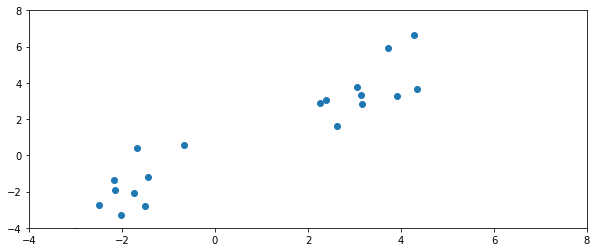

In [3]:
np.random.seed(200)
#x values are spaced out
x=np.append(np.random.normal(size=10,loc=-2, scale=.7),np.random.normal(size=10,loc=3, scale=.7) )

y=x+np.random.normal(size=20,loc=0, scale=1) #true slope is 1, true intercept is 0.

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,4))
plt.scatter(x,y)
ax.set_xlim([-4,8])
ax.set_ylim([-4,8])

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     154.1
Date:                Mon, 07 Dec 2020   Prob (F-statistic):           1.46e-10
Time:                        16:15:02   Log-Likelihood:                -29.888
No. Observations:                  20   AIC:                             61.78
Df Residuals:                      19   BIC:                             62.77
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.1115      0.090     12.413      0.0

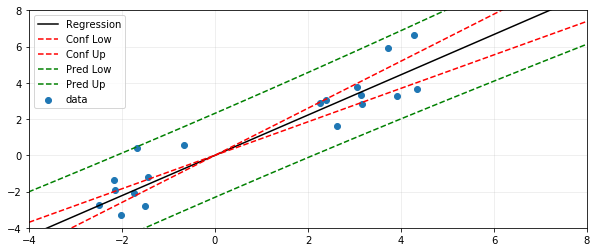

In [4]:
#make a model
lm1=sm.OLS(y, x).fit()

# Inspect the results
xgrd=np.linspace(-10,10,1000) #grid for plotting
#find confidence and predictive intervals all over our plot:
predictions = lm1.get_prediction(xgrd)
predmat=predictions.summary_frame(alpha=0.05)

#plot it all
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,4))
ax.grid(alpha=0.25)
ax.set_axisbelow(True)
ax.set_xlim([-4,8])
ax.set_ylim([-4,8])
plt.scatter(x,y, label='data')

#Plot each column
plt.plot(xgrd,(predmat.mean_ci_lower+predmat.mean_ci_upper)/2, color='black', label='Regression')
plt.plot(xgrd,predmat.mean_ci_lower, 'r--', label='Conf Low')
plt.plot(xgrd,predmat.mean_ci_upper, 'r--', label='Conf Up')
plt.plot(xgrd,predmat.obs_ci_lower, 'g--', label='Pred Low')
plt.plot(xgrd,predmat.obs_ci_upper, 'g--', label='Pred Up')
plt.legend()

print(lm1.summary())

**Fixing Case 1**.  

The usage above *didn't* use an intercept term $\beta_0$.  This is generally a very bad idea!  We should have added a column of 1's to $X$ via 

`X = sm.add_constant(X)`

and then proceeded.  This also means we have to add the "constant" dimension using add constant for our prediction function.  But now we get a much more reasonable result: some uncertainty on whether or not our model should actually go through (0,0).

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     135.6
Date:                Mon, 07 Dec 2020   Prob (F-statistic):           8.17e-10
Time:                        16:16:51   Log-Likelihood:                -29.712
No. Observations:                  20   AIC:                             63.42
Df Residuals:                      18   BIC:                             65.42
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1474      0.260      0.566      0.5

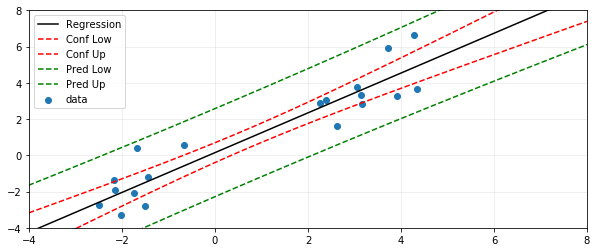

In [5]:
#Proper model:
lm2=sm.OLS(y, sm.add_constant(x)).fit()
print(lm2.summary())

#Prediction
newpred=lm2.get_prediction(sm.add_constant(xgrd))
predmat=newpred.summary_frame(alpha=0.05)

#plot it all
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,4))
ax.grid(alpha=0.25)
ax.set_axisbelow(True)
ax.set_xlim([-4,8])
ax.set_ylim([-4,8])
plt.scatter(x,y, label='data')
#can't use predmat.mean because bad naming convention
plt.plot(xgrd,(predmat.mean_ci_lower+predmat.mean_ci_upper)/2, color='black', label='Regression')
plt.plot(xgrd,predmat.mean_ci_lower, 'r--', label='Conf Low')
plt.plot(xgrd,predmat.mean_ci_upper, 'r--', label='Conf Up')
plt.plot(xgrd,predmat.obs_ci_lower, 'g--', label='Pred Low')
plt.plot(xgrd,predmat.obs_ci_upper, 'g--', label='Pred Up')
plt.legend()

### Case 2: X is clumped up

In this example, all 20 $X$ values are clumped up near zero instead.

(-4, 8)

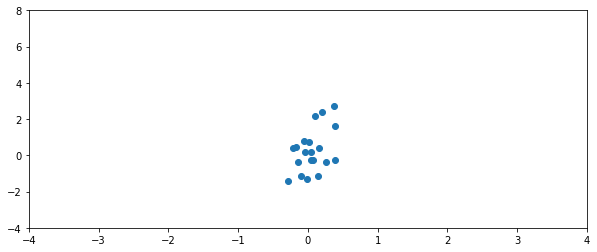

In [6]:
np.random.seed(200)
#x values clustered up near 0
x=np.random.normal(size=20,loc=0, scale=.2)
#x values have an outlier
#x[19]=5
#x values are spaced out
# x=np.append(np.random.normal(size=10,loc=-2, scale=.7),np.random.normal(size=10,loc=3, scale=.7) )
y=x+np.random.normal(size=20,loc=0, scale=1) #true slope is 1, true intercept is 0.

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,4))

plt.scatter(x,y)
ax.set_xlim([-4,4])
ax.set_ylim([-4,8])

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.212
Model:                            OLS   Adj. R-squared:                  0.168
Method:                 Least Squares   F-statistic:                     4.837
Date:                Mon, 07 Dec 2020   Prob (F-statistic):             0.0412
Time:                        16:18:03   Log-Likelihood:                -29.228
No. Observations:                  20   AIC:                             62.46
Df Residuals:                      18   BIC:                             64.45
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1105      0.257      0.430      0.6

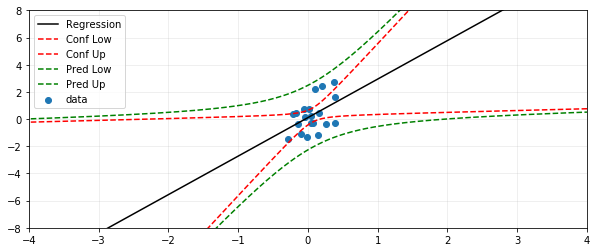

In [7]:

#Proper model:
lm3=sm.OLS(y, sm.add_constant(x)).fit()
print(lm3.summary())
newpred=lm3.get_prediction(sm.add_constant(xgrd))
predmat=newpred.summary_frame(alpha=0.05)

#plot it all

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,4))
ax.grid(alpha=0.25)
ax.set_axisbelow(True)
ax.set_xlim([-4,4])
ax.set_ylim([-8,8])
plt.scatter(x,y, label='data')

#Plot each column
plt.plot(xgrd,(predmat.mean_ci_lower+predmat.mean_ci_upper)/2, color='black', label='Regression')
plt.plot(xgrd,predmat.mean_ci_lower, 'r--', label='Conf Low')
plt.plot(xgrd,predmat.mean_ci_upper, 'r--', label='Conf Up')
plt.plot(xgrd,predmat.obs_ci_lower, 'g--', label='Pred Low')
plt.plot(xgrd,predmat.obs_ci_upper, 'g--', label='Pred Up')
plt.legend()



Look at how quickly we lose a handle on reasonable predictions!  This is because trying to predict `X` values that are far from where we actually observed `X` is called *extrapolation*, and we have no confidence in such a result!

The lack of confidence in inference far from zero is actually a good thing, though.  We have no data out there, so we shouldn't try to draw too strong of conclusions.  Something dangerous can happen if we have *only a little* data far from the other `X` values.

### Case 3: X has a *leverage* point

In this example, the first 19 $X$ values are clumped up near zero... but we also have an x relatively far away.

(-4, 10)

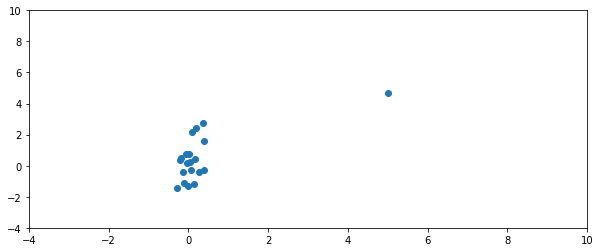

In [8]:
np.random.seed(200)
#x values clustered up near 0
x=np.random.normal(size=20,loc=0, scale=.2)
#x values have an outlier
x[19]=5
y=x+np.random.normal(size=20,loc=0, scale=1) #true slope is 1, true intercept is 0.


fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,4))

plt.scatter(x,y)
ax.set_xlim([-4,10])
ax.set_ylim([-4,10])

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.468
Model:                            OLS   Adj. R-squared:                  0.439
Method:                 Least Squares   F-statistic:                     15.85
Date:                Mon, 07 Dec 2020   Prob (F-statistic):           0.000877
Time:                        16:20:04   Log-Likelihood:                -30.262
No. Observations:                  20   AIC:                             64.52
Df Residuals:                      18   BIC:                             66.52
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2337      0.269      0.869      0.3

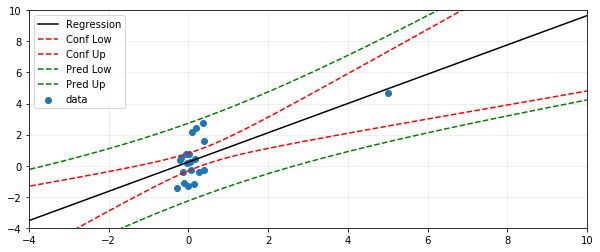

In [9]:

#Proper model:
lm4=sm.OLS(y, sm.add_constant(x)).fit()
print(lm4.summary())
newpred=lm4.get_prediction(sm.add_constant(xgrd))
predmat=newpred.summary_frame(alpha=0.05)

#plot it all

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,4))
ax.grid(alpha=0.25)
ax.set_axisbelow(True)
ax.set_xlim([-4,10])
ax.set_ylim([-4,10])
plt.scatter(x,y, label='data')

#Plot each column
plt.plot(xgrd,(predmat.mean_ci_lower+predmat.mean_ci_upper)/2, color='black', label='Regression')
plt.plot(xgrd,predmat.mean_ci_lower, 'r--', label='Conf Low')
plt.plot(xgrd,predmat.mean_ci_upper, 'r--', label='Conf Up')
plt.plot(xgrd,predmat.obs_ci_lower, 'g--', label='Pred Low')
plt.plot(xgrd,predmat.obs_ci_upper, 'g--', label='Pred Up')
plt.legend()



We're suddenly much more confident in our line!  The one point over at $x=5$ has almost double the size of our t-statistic on $x_1$!  Is this justified?  One way to understand the impact of an individual point is called the *leverage* of that point.  If a point is a large deviation from the other `X` values, it tends to have an enormous effect on the inference in the model.


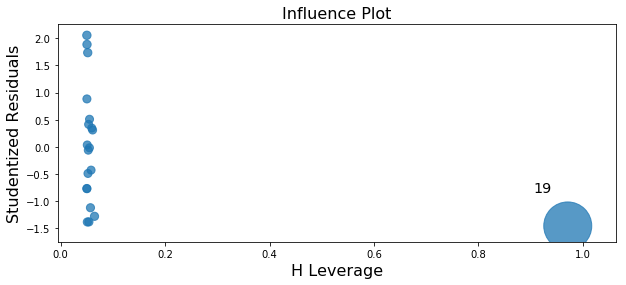

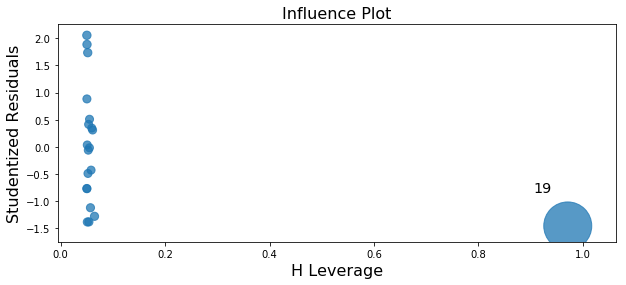

In [9]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,4))
sm.graphics.influence_plot(lm4, ax=ax, criterion="cooks")

Large deviations in `X` are called high influence points, large deviations in `Y` which cause large inference errors are called outliers.

What do you do if you have a high influence point?  Sometimes you just keep it in your model, but when you're writing up your analysis you should explicitly comment:

"The data points in index 19 is very high influence, and is having an undue influence on the rest of the model.  We should be less confident in our results far away from $x=0$ than the confidence bands may suggest!"

In [10]:
#A few other measures for points that looks like large deviations, if you're interested:
print(lm4.get_influence().summary_frame())

#cook's distance is a good one, but dfb also is a measurement for "x" spread.
#the resid columns at the end measure "y" deviations.

    dfb_const    dfb_x1    cooks_d    dffits  dffits_internal  hat_diag  \
0   -0.327278  0.160561   0.054497 -0.335846        -0.330141  0.064814   
1    0.191418  0.014268   0.020902  0.203212         0.204462  0.050248   
2   -0.317804  0.047155   0.048834 -0.320276        -0.312520  0.051108   
3    0.123219 -0.038045   0.007931  0.123325         0.125941  0.055259   
4   -0.114257  0.023841   0.006843 -0.114479        -0.116983  0.052267   
5   -0.329576  0.090346   0.051724 -0.329582        -0.321633  0.054062   
6   -0.003682  0.001121   0.000007 -0.003684        -0.003791  0.055104   
7    0.404178 -0.076377   0.073985  0.405562         0.384669  0.051838   
8   -0.105194  0.039787   0.005871 -0.105871        -0.108364  0.058223   
9    0.008478 -0.001139   0.000039  0.008560         0.008808  0.050901   
10   0.098884 -0.025388   0.005125  0.098892         0.101245  0.053528   
11  -0.170695  0.007135   0.015741 -0.175369        -0.177434  0.050083   
12  -0.014034  0.003277  

## Confidence in MLR

The same "spread of `X`" issue appears in multiple linear regression.  The estimators for the slope:

$$\hat{\beta}=\begin{pmatrix}
		\hat{\beta_0} \\
		\hat{\beta_1}\\
		\vdots\\
		\hat{\beta_p}
		\end{pmatrix}= \left( X^T X\right)^{-1} X^T \underline{Y}  $$
        
are matrices that are very similar to the SLR estimats.  The $ \left( X^T X\right)^{-1}$ bit corresponds to the $1/\sum\left(X_i -\bar{X}\right)^2 $ part from before, where the $ X^T \underline{Y}$ part corresponds roughly to a covariance between $X$ and $Y$.  What makes the $ \left( X^T X\right)^{-1}$ well enough spread out?  It's a measurement for how well the $X$ values fan out in all directions.

Consider the true model of:

$$y_i=0+x_{1,i}+x_{2,i}+\varepsilon$$

which is a pretty standard MLR with $\beta_0=0, \beta_1=1, \beta_2=1$.  We're going to consider two cases: 
- both sets of $x$ values are perfectly random and well-spaced, and *uncorrelated*
- the two $x$ values are pretty close together for each observation: in other words, $x_1$ and $x_2$ are *colinear,* or *correlated*.


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     31.42
Date:                Mon, 07 Dec 2020   Prob (F-statistic):           1.95e-06
Time:                        16:21:35   Log-Likelihood:                -28.059
No. Observations:                  20   AIC:                             62.12
Df Residuals:                      17   BIC:                             65.11
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3031      0.939      1.388      0.1

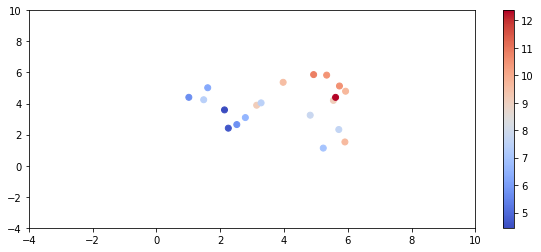

In [10]:
#Well spread X:
np.random.seed(200)
#x values clustered up near 0
x1=np.random.uniform(size=20,low=1, high=6)
x2=np.random.uniform(size=20,low=1, high=6)
y=x1+x2+np.random.normal(size=20,loc=0, scale=1) #true slope is 1, true intercept is 0.



fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,4))
plt.scatter(x1, x2, c=y,cmap=plt.cm.coolwarm)
plt.colorbar()
ax.set_xlim([-4,10])
ax.set_ylim([-4,10])


#Proper model:
mlr1=sm.OLS(y, sm.add_constant(np.column_stack((x1,x2)))).fit()
print(mlr1.summary())

This model looks great!  We can't really tell that the intercept was 0, but we're recovered that each regression coefficient is non-zero, and the true value of 1 is inside each confidence interval.  But check out the case where the $X$ values lie on the same line, making them redundant:

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     78.53
Date:                Mon, 07 Dec 2020   Prob (F-statistic):           2.59e-09
Time:                        16:21:36   Log-Likelihood:                -31.257
No. Observations:                  20   AIC:                             68.51
Df Residuals:                      17   BIC:                             71.50
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3256      0.735     -0.443      0.6

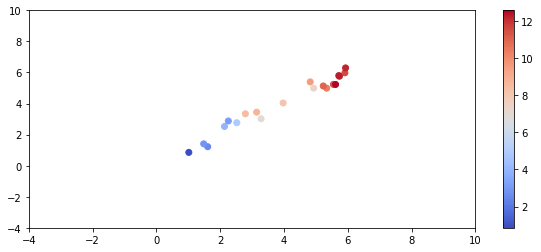

In [11]:
#Well spread X:
np.random.seed(200)
#x values clustered up near 0
x1=np.random.uniform(size=20,low=1, high=6)
x2=x1+np.random.normal(size=20,loc=0, scale=.3)
y=x1+x2+np.random.normal(size=20,loc=0, scale=1) #true slope is 1, true intercept is 0.



fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,4))
plt.scatter(x1, x2, c=y,cmap=plt.cm.coolwarm)
plt.colorbar()
ax.set_xlim([-4,10])
ax.set_ylim([-4,10])


#Proper model:
mlr2=sm.OLS(y, sm.add_constant(np.column_stack((x1,x2)))).fit()
print(mlr2.summary())

Now we can't actually tell whether `x1` or `x2` is responsible for the changes in y.  One way to think of this: we know that $y$ is suppose to increase as we move "up and right", but it can't tell whether that movement is supposed to be from the *rightward* x-variable **or** from the *upward* x-variable.  We don't have any observations in the top-left or bottom-right to help sort this out!

As a result, none of the *marginal* regression coefficients look significant, despite the adjusted $R^2$ of this model actually exceeding that of the prior example.